# Step1 and Step 2:split data into training and test sets. Using neural network to analyze the data and adjust suitable parameter.

In [6]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig
from sklearn.preprocessing import Imputer
from sklearn.neural_network import MLPClassifier

titanic = pd.read_csv('D:\SIT_Class\EE695Machine Learning\HW2\Titanic.csv')


xdata = titanic[['pclass','age','sex','sibsp']]
ydata = titanic['survived']
fname = ['pclass','age','sex','sibsp']
titanic.info()
#print(x['age'].mode())
xdata['age'].fillna(24.0,inplace = True)
#x.info()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xdata,ydata,test_size = 0.4,random_state = 100)

#Convert Sex into workable feature, 1 for female and 0 for male passenger
x_train['sex'] = x_train['sex'].map({'female': 1, 'male': 0})
x_test['sex'] = x_test['sex'].map({'female': 1, 'male': 0})

x_train['pclass'] = x_train['pclass'].map({'1st': 1, '2nd': 2,'3rd':3})
x_test['pclass'] = x_test['pclass'].map({'1st': 1, '2nd': 2,'3rd':3})
# Impute missing age values with median age
print(x_train['age'].head)
x_train['age'] = x_train['age'].fillna(x_train['age'].median())
x_test['age'] = x_test['age'].fillna(x_test['age'].median())
print(x_train['age'].head)
# Create a variable for if passenger was a minor (ie<18)
x_train['minor?'] = 0
x_train['minor?'][x_train['age'] < 15] = 1
x_test['minor?'] = 0
x_test['minor?'][x_test['age'] < 15] = 1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null object
survived      1309 non-null int64
name          1309 non-null object
sex           1309 non-null object
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
ticket        1309 non-null object
fare          1308 non-null float64
cabin         295 non-null object
embarked      1307 non-null object
boat          486 non-null object
body          121 non-null float64
home.dest     745 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB
<bound method NDFrame.head of 209     30.0000
1104    16.0000
510     16.0000
171     46.0000
1073    24.0000
335     51.0000
1293    24.0000
72      26.0000
1300    15.0000
1162    24.0000
480     25.0000
795     24.0000
892     31.0000
741     22.5000
265     28.0000
1292    24.0000
413     38.0000
227    

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipyker

# Step 3: check the performance of the model: in-sample and out-of- sample accuracy

In [13]:
# Create multilayer perceptron model
clf = MLPClassifier(activation='tanh', alpha=2, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
        hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       random_state=1,shuffle=True, solver='adam')
clf.fit(x_train,y_train)
print("clf:" + str(clf))
print("\n")

# Create prediction file
predictions = clf.predict(x_test)
predictions1 = clf.predict(x_train)
from sklearn.metrics import accuracy_score
print ("accuracy in sample : "+str(accuracy_score(y_train, predictions1)))
print ("accuracy out of sample : "+str(accuracy_score(y_test, predictions)))


clf:MLPClassifier(activation='tanh', alpha=2, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


accuracy in sample : 0.811464968153
accuracy out of sample : 0.780534351145


In [14]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
))
print("\n")
a=[]
a=confusion_matrix(y_test, predictions )
print("Percent of survivors correctly predicted(on test set):")
print(a[1][1]/(a[1][1]+a[1][0]))
print("Percent of fatalities correctly predicted(on test set):")
print(a[0][0]/(a[0][1]+a[0][0]))
print("\n")

                   Predicted Not Survival  Predicted Survival
True Not Survival                     277                  47
True Survival                          68                 132


Percent of survivors correctly predicted(on test set):
0.66
Percent of fatalities correctly predicted(on test set):
0.854938271605




In [15]:
## from sklearn.metrics import confusion_matrix
print(pd.DataFrame(
    confusion_matrix(y_train, predictions1),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
))
print("\n")
a=[]
a=confusion_matrix(y_train, predictions1 )
print("Percent of survivors correctly predicted(on training set):")
print(a[1][1]/(a[1][1]+a[1][0]))
print("Percent of fatalities correctly predicted(on training set):")
print(a[0][0]/(a[0][1]+a[0][0]))
print("\n")

                   Predicted Not Survival  Predicted Survival
True Not Survival                     427                  58
True Survival                          90                 210


Percent of survivors correctly predicted(on training set):
0.7
Percent of fatalities correctly predicted(on training set):
0.880412371134




In [51]:
for j in range (3,10):
    
# Create multilayer perceptron model
    clf1 = MLPClassifier(activation='tanh', alpha=2, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
        hidden_layer_sizes=(j, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       random_state=1,shuffle=True, solver='adam')
    clf1.fit(x_train,y_train)

# Create prediction file
    predictions2 = clf1.predict(x_test)
    predictions3 = clf1.predict(x_train)
    from sklearn.metrics import accuracy_score
    print ("accuracy in sample with "+str(j)+" neurons in hidden layer : "+str(accuracy_score(y_train, predictions3)))
    print ("accuracy out of sample with "+str(j)+" neurons in hidden layer : "+str(accuracy_score(y_test, predictions2)))
    print("\n")

accuracy in sample with 3 neurons in hidden layer : 0.810191082803
accuracy out of sample with 3 neurons in hidden layer : 0.774809160305


accuracy in sample with 4 neurons in hidden layer : 0.812738853503
accuracy out of sample with 4 neurons in hidden layer : 0.774809160305


accuracy in sample with 5 neurons in hidden layer : 0.811464968153
accuracy out of sample with 5 neurons in hidden layer : 0.780534351145


accuracy in sample with 6 neurons in hidden layer : 0.815286624204
accuracy out of sample with 6 neurons in hidden layer : 0.782442748092


accuracy in sample with 7 neurons in hidden layer : 0.810191082803
accuracy out of sample with 7 neurons in hidden layer : 0.790076335878


accuracy in sample with 8 neurons in hidden layer : 0.808917197452
accuracy out of sample with 8 neurons in hidden layer : 0.765267175573


accuracy in sample with 9 neurons in hidden layer : 0.811464968153
accuracy out of sample with 9 neurons in hidden layer : 0.793893129771




# Step 4:compare the in-sample and out-of-sample accuracy (as defined in step 3) with the pruned decision tree obtained in homework 2.

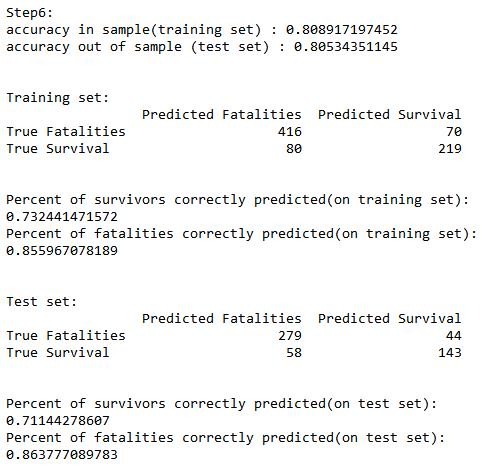

In Hw3 the best accuracy is the hidden layers have 5 neurons:

accuracy in sample with 5 neurons in hidden layer : 0.811464968153

accuracy out of sample with 5 neurons in hidden layer : 0.780534351145

Percent of survivors correctly predicted(on training set):
0.7

Percent of fatalities correctly predicted(on training set):
0.880412371134

Percent of survivors correctly predicted(on test set):
0.66

Percent of fatalities correctly predicted(on test set):
0.854938271605

###########################################################

In Hw2 the best accuracy is:

accuracy in sample(training set) : 0.808917197452

accuracy out of sample (test set) : 0.80534351145

Percent of survivors correctly predicted(on training set):
0.732441471572

Percent of fatalities correctly predicted(on training set):
0.855967078189

Percent of survivors correctly predicted(on test set):
0.71144278607

Percent of fatalities correctly predicted(on test set):
0.863777089783

###########################################################

By comparing the two sets of results, the hw2 decision tree has a slightly better accuracy. But the two methods results are very close to each other.